# Analyzing My Personal Music Library: Trends, Moods, and Predictions.

I decided to analyze my personal playlists because I think that it would be interesting to see trends in what I listen to and predict what I will listen to in the future. My goal with this essay is to find correlations in my music and interpret that data to be able to understand my finding. 

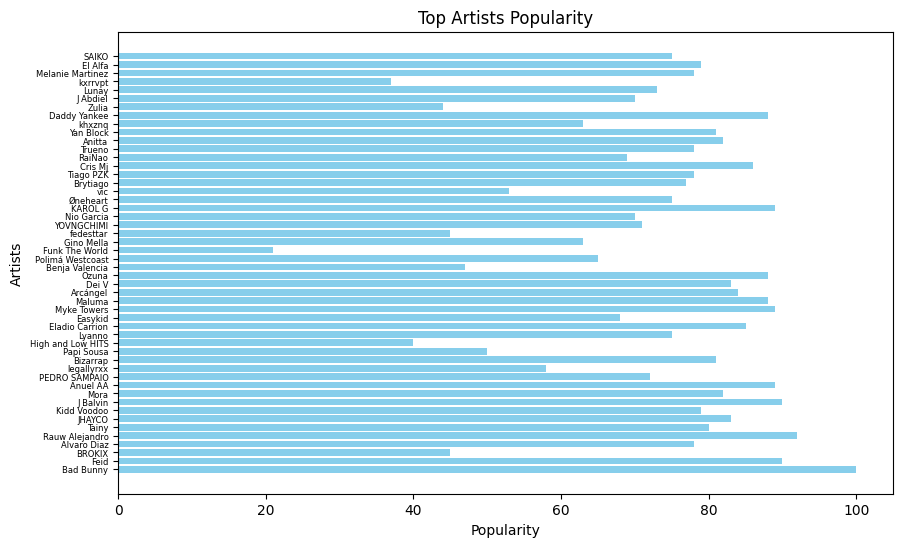

In [16]:
from spotipy import Spotify, SpotifyOAuth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import requests

import os

load_dotenv("secrets.env")

spotify_client_id = os.getenv('SPOTIFY_CLIENT_ID')
spotify_client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
spotify_redirect_uri = os.getenv('SPOTIFY_REDIRECT_URI')

scope = "playlist-modify-public user-top-read user-library-read user-read-recently-played user-follow-read"

sp = Spotify(auth_manager=SpotifyOAuth(client_id=spotify_client_id, client_secret=spotify_client_secret, redirect_uri=spotify_redirect_uri, scope=scope))

# this will extract the top artists of all time from the user account
top_artists = sp.current_user_top_artists(limit=50, time_range='long_term')

artists = [artist for artist in top_artists['items']]

artists_df = pd.DataFrame(artists)

# Extracting the relevant information from the artists

plt.figure(figsize=(10, 6))
plt.barh(artists_df['name'], artists_df['popularity'], color='skyblue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)
plt.ylabel('Artists')
plt.xlabel('Popularity')
plt.title('Top Artists Popularity')

plt.show()


### Interpretation

As you can see, I have plotted the popularity of my top 50 most listened to artists on a bar graph and its pretty evident that most of the artists I listen to are above the 50 percent popularity mark. To showcase this further, I will plot these onto a scatter plot to show the overall grouping of these artists.

             name  followers_total
0       Bad Bunny         95183342
1            Feid         17273490
2          BROKIX            18790
3     Alvaro Diaz          1285346
4  Rauw Alejandro         28426510


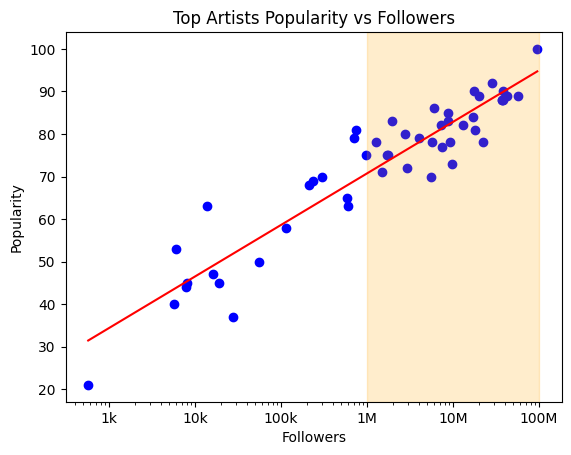

In [41]:
artists_df['followers_total'] = artists_df['followers'].apply(lambda x: x['total'])

print(artists_df[['name', 'followers_total']].head())

z = np.polyfit(np.log10(artists_df['followers_total']), artists_df['popularity'], 1)
p = np.poly1d(z)

plt.scatter(x=artists_df['followers_total'], y=artists_df['popularity'], color='blue')

plt.axvspan(1e6, 1e8, color='orange', alpha=0.2, label='Cluster: 1M-100M followers')

plt.title(label='Top Artists Popularity vs Followers')
plt.xlabel(xlabel='Followers')
plt.ylabel(ylabel='Popularity')
plt.xscale('log')

x_vals = np.logspace(
    np.log10(artists_df['followers_total'].min()),
    np.log10(artists_df['followers_total'].max()),
    100
)

ticks = [1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
labels = ['100', '1k', '10k', '100k', '1M', '10M', '100M']
plt.xticks(ticks, labels)

plt.plot(x_vals, p(np.log10(x_vals)), color='red', label='Trendline')

plt.show()